### **Bibliotecas**


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
!pip install yfinance

In [ ]:
!pip install quantstats

In [4]:
!pip -q install yfinance

In [5]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
import pandas as pd
import string
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pandas.util._tester import test
import pandas.testing
import pandas.arrays
import quantstats as qs
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

import urllib.request
from bs4 import BeautifulSoup

from itertools import combinations
import IPython
import cufflinks as cf
cf.go_offline()
#cf.getThemes()

## plotly
import plotly

# configurando o plotly para rodar adequadamento no google colab junto com cufflinks
plotly.io.renderers.defaut = 'colab'

In [8]:
import sqlite3
conn = sqlite3.connect('rhcp.db')


In [9]:
from google.colab import files

In [10]:
qs.extend_pandas()

## **Capturando e tratando Dados**

##***Dados do site Fundamentos***

In [11]:
url = 'http://www.fundamentus.com.br/resultado.php'

In [12]:
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [13]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

In [14]:
df.sort_values('Liq.2meses', ascending=False).head(15)

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
440,VALE3,66.83,3.58,1.89,1.134,"22,55%",0.726,16.11,1.88,-1.92,1.96,1.80,"60,25%","31,39%",1.24,"46,56%","52,78%",2.564840e+09,1.812960e+11,0.41,"27,44%"
423,PETR4,26.85,2.59,0.95,0.890,"8,95%",0.359,12.66,2.02,-0.81,3.54,2.58,"43,99%","34,56%",1.20,"19,61%","36,59%",2.293870e+09,3.690770e+11,0.88,"4,96%"
631,ITUB4,24.45,9.17,1.75,0.000,"2,88%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","19,12%",1.151650e+09,1.368120e+11,0.00,"-35,57%"
629,BBDC4,20.40,9.10,1.35,0.000,"5,68%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","14,87%",1.001380e+09,1.464880e+11,0.00,"29,19%"
766,B3SA3,12.00,15.70,3.24,7.118,"6,84%",1.484,9.98,11.13,-10.57,9.88,8.51,"63,92%","45,34%",1.59,"21,30%","20,64%",7.001200e+08,2.269270e+10,0.44,"37,30%"
729,PRIO3,23.80,13.65,3.68,4.039,"0,00%",1.826,4.93,9.05,-70.96,8.84,6.49,"44,61%","29,60%",4.46,"34,39%","26,94%",6.194600e+08,5.686920e+09,0.71,"74,73%"
946,MGLU3,11.55,98.87,10.61,2.163,"0,35%",3.075,16.83,66.84,-42.65,67.34,41.05,"3,24%","2,19%",1.40,"7,65%","10,73%",5.934250e+08,7.265610e+09,0.32,"33,56%"
426,PETR3,27.48,2.65,0.97,0.911,"8,74%",0.368,12.95,2.07,-0.83,3.58,2.61,"43,99%","34,56%",1.20,"19,61%","36,59%",5.500650e+08,3.690770e+11,0.88,"4,96%"
513,SUZB3,49.77,5.54,5.01,1.806,"0,00%",0.598,3.27,4.87,-0.97,9.07,6.05,"37,11%","32,62%",3.32,"15,18%","90,48%",4.993300e+08,1.351850e+10,5.71,"41,36%"
562,JBSS3,36.76,6.80,2.20,0.301,"5,49%",0.536,4.16,4.39,-1.57,6.90,4.93,"6,86%","4,42%",1.48,"16,36%","32,41%",4.821380e+08,4.189820e+10,1.70,"17,37%"


In [15]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.', '')
  df[coluna] = df[coluna].str.replace(',', '.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100


***Analisando os Dados - Fundamentus***

In [16]:
df = df[df['Liq.2meses'] > 10000000]

In [17]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,151)
ranking['EV/EBIT'] = df[ df['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:150].values
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:150].values
ranking['ROE'] = df.sort_values(by=['ROE'], ascending=False)['Papel'][:150].values
ranking['Mrg. Líq.'] = df.sort_values(by=['Mrg. Líq.'], ascending=False)['Papel'][:150].values
ranking['EV/EBITDA'] = df.sort_values(by=['EV/EBITDA'], ascending=False)['Papel'][:150].values
ranking['Cresc. Rec.5a'] = df.sort_values(by=['Cresc. Rec.5a'], ascending=False)['Papel'][:150].values

In [18]:
ranking.head(15)

,pos,EV/EBIT,ROIC,ROE,Mrg. Líq.,EV/EBITDA,Cresc. Rec.5a
0,1,PSSA3,CMIN3,TASA4,LOGG3,CASH3,RCSL3
1,2,GOAU4,WIZS3,BEEF3,ITSA4,AESB3,PRIO3
2,3,USIM5,PSSA3,BRKM5,LUPA3,RCSL3,VAMO3
3,4,EVEN3,TASA4,MRFG3,CESP6,LWSA3,VIVR3
4,5,CMIN3,VALE3,SUZB3,TRPL4,ELET3,BPAC11
5,6,VALE3,UNIP6,VIVR3,ENAT3,ELET6,LCAM3
6,7,LAVV3,BLAU3,CSNA3,JPSA3,SOMA3,AGRO3
7,8,CSNA3,ETER3,ASAI3,TAEE11,ITSA4,ALUP11
8,9,CIEL3,MRFG3,ETER3,IGTA3,SMFT3,HBSA3
9,10,ETER3,CSNA3,LUPA3,BRPR3,MGLU3,JHSF3


In [19]:
a = ranking.pivot_table(columns='EV/EBIT', values='pos').head(15)

In [20]:
b = ranking.pivot_table(columns='ROIC', values='pos').head(15)

In [21]:
c = ranking.pivot_table(columns='ROE', values='pos')

In [22]:
d = ranking.pivot_table(columns='Mrg. Líq.', values='pos')

In [23]:
e = b = ranking.pivot_table(columns='EV/EBITDA', values='pos')

In [24]:
f = b = ranking.pivot_table(columns='Cresc. Rec.5a', values='pos')

In [25]:
t = pd.concat([a,b,c,d,e,f])
t

,AALR3,ABEV3,AESB3,AGRO3,ALLD3,ALPA4,ALSO3,ALUP11,AMAR3,AMBP3,AMER3,ANIM3,ARZZ3,ASAI3,B3SA3,BEEF3,BLAU3,BMOB3,BRFS3,BRKM5,BRML3,BRPR3,CAML3,CCRO3,CESP6,CIEL3,CMIG4,CMIN3,CPFE3,CPLE11,CPLE3,CPLE6,CRFB3,CSAN3,CSMG3,CSNA3,CYRE3,DIRR3,DXCO3,ECOR3,...,VIVA3,VIVT3,WEGE3,WIZS3,YDUQ3,BBAS3,BBDC3,BBDC4,BIDI11,BIDI3,BIDI4,BKBR3,BPAC11,BPAN4,BRAP3,BRBI11,BRSR6,CASH3,CEAB3,IRBR3,LWSA3,MLAS3,SANB11,SMFT3,SULA11,TRAD3,VIVR3,ABCB4,AZUL4,BBSE3,BRAP4,CXSE3,ELET3,ELET6,GOLL4,ITUB3,ITUB4,LUPA3,COGN3,MEAL3
pos,112.0,100,148.0,36,24.0,125.0,106.0,15,95.0,127,144.0,120.0,126,86.0,76,39,89,57,83,13,99.0,118.0,65,88,63,9.0,35,5.0,49,37,34,40,59,116,42,8.0,73,41,62,51.0,...,111,96,134,12,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,NaN,93,NaN,7,NaN,NaN,23.0,8,NaN,146,76.0,63.0,68,NaN,19,42,47,139,114,83,NaN,NaN,37,128,92,NaN,102,NaN,94,79,77,78,65,33,101,39.0,71,51,54,87.0,...,140,134,40,53,120,131.0,25.0,26.0,14.0,12.0,13.0,119.0,5.0,67.0,149.0,150.0,90.0,144.0,72.0,89.0,16.0,137.0,113.0,62.0,127.0,145.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,NaN,76,66.0,93,52.0,100.0,NaN,60,NaN,130,NaN,NaN,88,8.0,64,2,58,146,119,3,NaN,NaN,87,131,37,126.0,59,15.0,34,80,81,82,73,48,118,7.0,27,112,50,NaN,...,84,137,40,12,142,111.0,91.0,92.0,NaN,NaN,NaN,NaN,69.0,103.0,21.0,NaN,122.0,NaN,NaN,NaN,NaN,NaN,67.0,NaN,53.0,NaN,6.0,114.0,65.0,13.0,22.0,83.0,135.0,136.0,56.0,72.0,71.0,10.0,NaN,NaN
pos,130.0,36,16.0,33,112.0,88.0,47.0,15,NaN,93,NaN,145.0,95,106.0,14,134,34,39,137,85,77.0,10.0,115,107,4,49.0,68,23.0,76,59,58,60,118,69,78,18.0,11,87,53,NaN,...,54,86,66,32,120,NaN,NaN,NaN,150.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,148.0,NaN,139.0,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,44.0,NaN,NaN,NaN,3.0,NaN,NaN
pos,66.0,52,2.0,122,133.0,23.0,54.0,140,107.0,29,17.0,43.0,25,58.0,74,111,55,98,94,150,39.0,22.0,85,97,92,NaN,120,NaN,102,121,123,116,84,36,132,NaN,69,109,103,108.0,...,34,114,12,144,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,80.0,NaN,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,26.0,41.0
pos,NaN,93,NaN,7,NaN,NaN,23.0,8,NaN,146,76.0,63.0,68,NaN,19,42,47,139,114,83,NaN,NaN,37,128,92,NaN,102,NaN,94,79,77,78,65,33,101,39.0,71,51,54,87.0,...,140,134,40,53,120,131.0,25.0,26.0,14.0,12.0,13.0,119.0,5.0,67.0,149.0,150.0,90.0,144.0,72.0,89.0,16.0,137.0,113.0,62.0,127.0,145.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
rank = t.dropna(axis=1).sum().head(15)
rank

ABEV3     450
AGRO3     298
ALUP11    246
AMBP3     671
ARZZ3     470
B3SA3     266
BEEF3     370
BLAU3     330
BMOB3     618
BRFS3     661
BRKM5     417
CAML3     426
CCRO3     679
CESP6     380
CMIG4     486
dtype: int64

In [27]:
rank.sort_values()[:15]

ALUP11    246
B3SA3     266
AGRO3     298
BLAU3     330
BEEF3     370
CESP6     380
BRKM5     417
CAML3     426
ABEV3     450
ARZZ3     470
CMIG4     486
BMOB3     618
BRFS3     661
AMBP3     671
CCRO3     679
dtype: int64

## ***Dados do site da B3*** 

In [28]:
def busca_carteira_teorica(indice): 
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1]

In [29]:
def get_tickers(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return (pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1].index + '.SA').to_list()

In [30]:
ibov = busca_carteira_teorica('ibov')

In [31]:
ibov.sort_values('Part. (%)', ascending=False).head(15)

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
VALE3,VALE,ON NM,2837320141,13.770
ITUB4,ITAUUNIBANCO,PN EDJ N1,4757466114,5.802
B3SA3,B3,ON NM,1930877944,5.167
PETR4,PETROBRAS,PN N2,4566457037,4.946
BBDC4,BRADESCO,PN EJ N1,4261649634,4.663
PETR3,PETROBRAS,ON N2,3307982840,3.585
MGLU3,MAGAZ LUIZA,ON NM,2668955512,3.226
ABEV3,AMBEV S/A,ON,4355174839,2.953
WEGE3,WEG,ON ED NM,741148001,2.847


In [32]:
smll = busca_carteira_teorica('smll').head(15)

In [33]:
smll.sort_values('Part. (%)', ascending=False).head(15)

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
AZUL4,AZUL,PN N2,327283207,3.889
BRML3,BR MALLS PAR,ON NM,843728684,2.045
BPAN4,BANCO PAN,PN N1,341124068,1.473
ALUP11,ALUPAR,UNT N2,143807403,0.989
ARZZ3,AREZZO CO,ON NM,45095471,0.953
ALSO3,ALIANSCSONAE,ON NM,127376805,0.862
BKBR3,BK BRASIL,ON NM,272245759,0.727
BRSR6,BANRISUL,PNB N1,202531540,0.720
BEEF3,MINERVA,ON NM,239331676,0.685


In [34]:
ibrx = busca_carteira_teorica('ibrx')

In [35]:
ibrx.sort_values('Part. (%)', ascending=False).head(15)

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
VALE3,VALE,ON NM,5128642481,21.441
ITUB4,ITAUUNIBANCO,PN EDJ N1,4757466114,4.998
B3SA3,B3,ON NM,2043531244,4.711
PETR4,PETROBRAS,PN N2,4566457037,4.261
BBDC4,BRADESCO,PN EJ N1,4261649634,4.017
PETR3,PETROBRAS,ON N2,3684060179,3.439
MGLU3,MAGAZ LUIZA,ON NM,2668955512,2.779
ABEV3,AMBEV S/A,ON,4355174839,2.544
WEGE3,WEG,ON ED NM,741148001,2.452


In [36]:
pd.concat([ibov, ibrx], keys=['IBOV', 'IBRX'], axis=1)

IBOV                           ...       IBRX                        
             Ação       Tipo Qtde. Teórica  ...       Tipo Qtde. Teórica Part. (%)
ABEV3   AMBEV S/A         ON    4355174839  ...         ON    4355174839     2.544
ASAI3       ASSAI      ON NM     157635935  ...      ON NM     157635935     0.477
AZUL4        AZUL      PN N2     327283207  ...      PN N2     327283207     0.556
B3SA3          B3      ON NM    1930877944  ...      ON NM    2043531244     4.711
BBAS3      BRASIL  ON ERJ NM    1283197221  ...  ON ERJ NM    1283197221     1.516
...           ...        ...           ...  ...        ...           ...       ...
NEOE3         NaN        NaN           NaN  ...      ON NM     226115915     0.150
PSSA3         NaN        NaN           NaN  ...      ON NM      93637072     0.171
RAPT4         NaN        NaN           NaN  ...      PN N1     177421406     0.095
SAPR11        NaN        NaN           NaN  ...     UNT N2     200991234     0.166
TRPL4         NaN        NaN           NaN  ...   PN ED N1     395797044     0.395

[101 rows x 8 columns]

###***Outros Dados B3 ***`

In [37]:
ibov = web.get_data_yahoo('^BVSP', start='2016-01-01', end='2021-09-01')

[*********************100%***********************]  1 of 1 completed


In [38]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,43349.0,43349.0,42125.0,42141.0,42141.0,2976300
2016-01-05,42139.0,42534.0,42137.0,42419.0,42419.0,2557200
2016-01-06,42410.0,42410.0,41590.0,41773.0,41773.0,3935900
2016-01-07,41772.0,41772.0,40695.0,40695.0,40695.0,4032300
2016-01-08,40695.0,41218.0,40463.0,40612.0,40612.0,3221600


In [39]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,120210.0,120818.0,119226.0,120818.0,120818.0,7520100
2021-08-26,120817.0,120833.0,118719.0,118724.0,118724.0,8426900
2021-08-27,118725.0,120678.0,118721.0,120678.0,120678.0,7323600
2021-08-30,120677.0,120684.0,119354.0,119740.0,119740.0,6391900
2021-08-31,119738.0,120157.0,117911.0,118781.0,118781.0,11535600


In [40]:
ibov.risk_return_ratio()

Open         0.051370
High         0.063989
Low          0.056382
Close        0.052021
Adj Close    0.052021
Volume       0.035253
dtype: float64

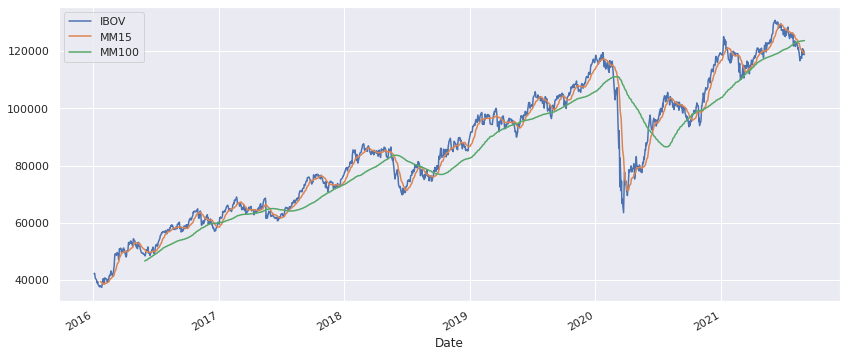

In [41]:
ibov["Close"].plot(figsize=(14,6), label="IBOV")
ibov["Close"].rolling(15).mean().plot(label="MM15")
ibov["Close"].rolling(100).mean().plot(label="MM100")
plt.legend();

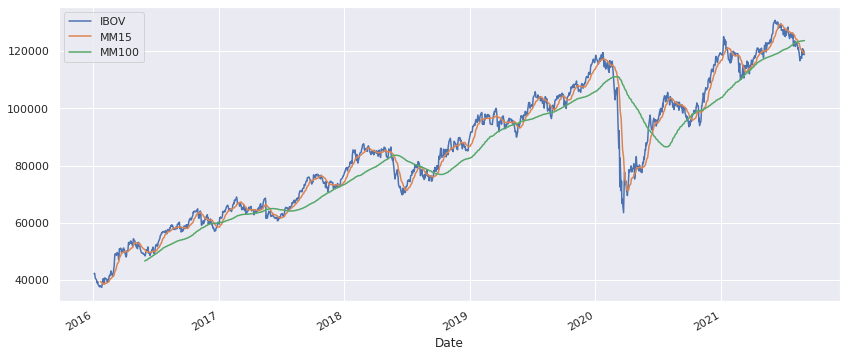

In [42]:
ibov_fatiado = ibov[(ibov.index.year >= 2016) & (ibov.index.year <= 2021)]
ibov_fatiado["Close"].plot(figsize=(14,6), label="IBOV")
ibov_fatiado["Close"].rolling(15).mean().plot(label="MM15")
ibov_fatiado["Close"].rolling(100).mean().plot(label="MM100")
plt.legend();

In [43]:
ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-08,113590.0,114381.0,112820.0,113571.0,113571.0,8810900
2020-12-09,113799.0,114020.0,112567.0,112722.0,112722.0,8431100
2020-12-10,113002.0,115262.0,112732.0,114992.0,114992.0,11803600
2020-12-11,115128.0,115527.0,113949.0,115323.0,115323.0,8372300
2020-12-14,115137.0,115740.0,114431.0,114975.0,114975.0,8190900
2020-12-15,114613.0,116390.0,114613.0,116146.0,116146.0,8195100
2020-12-16,116149.0,118178.0,115496.0,117947.0,117947.0,9808100
2020-12-17,117864.0,119027.0,117856.0,118157.0,118157.0,7701400
2020-12-18,118395.0,119370.0,117639.0,117679.0,117679.0,8636000


In [44]:
ibov_fatiado = ibov[ibov.index.year == 2016]
ibov_fatiado.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-09,60688.0,61129.0,60316.0,60501.0,60501.0,3339800
2016-12-12,60517.0,60517.0,59035.0,59179.0,59179.0,3244400
2016-12-13,59178.0,59946.0,58758.0,59281.0,59281.0,3589100
2016-12-14,59280.0,59338.0,58212.0,58212.0,58212.0,3857000
2016-12-15,58214.0,58635.0,57575.0,58396.0,58396.0,3569400
2016-12-16,58398.0,59312.0,58365.0,58389.0,58389.0,3683900
2016-12-19,58390.0,58600.0,57109.0,57111.0,57111.0,3396500
2016-12-20,57116.0,57918.0,57038.0,57583.0,57583.0,2673400
2016-12-21,57583.0,58049.0,57221.0,57647.0,57647.0,2461900


 **Yahoo Finance busca de códigos da Empresas que compõem os indices de acordo com as cotações **

In [45]:
t = get_tickers('ibov')
t

['ABEV3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BRAP4.SA',
 'BRDT3.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BTOW3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'IGTA3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LAME4.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SULA11.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'USIM

In [46]:
ibov = yf.download(t, period='1mo', group_by='ticker')
ibov

[*********************100%***********************]  82 of 82 completed

3 Failed downloads:
- HGTX3.SA: No data found for this date range, symbol may be delisted
- VVAR3.SA: No data found, symbol may be delisted
- BTOW3.SA: No data found, symbol may be delisted


COGN3.SA              ...   GGBR4.SA                     
               Open  High   Low  ...      Close  Adj Close    Volume
Date                             ...                                
2021-10-04     2.91  2.95  2.78  ...  27.139999  27.139999  13296400
2021-10-05     2.81  2.87  2.77  ...  27.000000  27.000000   8170300
2021-10-06     2.78  2.80  2.68  ...  26.459999  26.459999  14139000
2021-10-07     2.80  2.93  2.80  ...  26.889999  26.889999  13450000
2021-10-08     2.92  3.08  2.92  ...  27.180000  27.180000   9613200
2021-10-11     3.01  3.05  2.94  ...  27.170000  27.170000  14998300
2021-10-13     2.96  3.20  2.95  ...  27.629999  27.629999  12068800
2021-10-14     3.20  3.22  3.05  ...  28.160000  28.160000  19144700
2021-10-15     3.07  3.15  3.04  ...  28.170000  28.170000  10193000
2021-10-18     3.11  3.14  3.01  ...  28.180000  28.180000  14040000
2021-10-19     3.08  3.09  2.87  ...  27.830000  27.830000  15199100
2021-10-20     2.92  2.97  2.88  ...  27.410000  27.410000   9519900
2021-10-21     2.83  2.90  2.70  ...  26.559999  26.559999  14156200
2021-10-22     2.69  2.73  2.47  ...  26.730000  26.730000  15111500
2021-10-25     2.68  2.75  2.64  ...  27.959999  27.959999  11247000
2021-10-26     2.67  2.68  2.51  ...  28.049999  28.049999  19989400
2021-10-27     2.52  2.70  2.52  ...  27.350000  27.350000  28335000
2021-10-28     2.58  2.68  2.52  ...  27.400000  27.400000  15078100
2021-10-29     2.58  2.60  2.48  ...  26.900000  26.900000   9867100
2021-11-01     2.55  2.80  2.54  ...  26.600000  26.600000  11210800
2021-11-03     2.79  3.01  2.77  ...  25.549999  25.549999  18009200
2021-11-04     2.90  2.93  2.66  ...  25.530001  25.530001  14572000

[22 rows x 492 columns]

In [47]:
ifix = yf.download(get_tickers('ifix'), period='1mo', group_by='ticker')
ifix

[*********************100%***********************]  87 of 87 completed


HSML11.SA                        ...  RBRR11.SA                  
                 Open       High        Low  ...      Close  Adj Close Volume
Date                                         ...                             
2021-10-04  79.180000  79.449997  78.500000  ...  97.500000  97.500000  29882
2021-10-05  79.099998  79.989998  78.699997  ...  98.150002  98.150002  26515
2021-10-06  79.000000  79.220001  78.150002  ...  98.080002  98.080002  27131
2021-10-07  78.379997  79.000000  78.320000  ...  98.019997  98.019997  22072
2021-10-08  79.110001  79.900002  78.720001  ...  97.300003  97.300003  24969
2021-10-11  79.059998  79.769997  79.059998  ...  98.519997  98.519997  46301
2021-10-13  79.589996  79.970001  79.300003  ...  97.589996  97.589996  31675
2021-10-14  79.870003  79.970001  79.599998  ...  98.470001  98.470001  38496
2021-10-15  79.949997  80.430000  79.709999  ...  98.250000  98.250000  18052
2021-10-18  80.000000  81.430000  79.790001  ...  99.000000  99.000000  23552
2021-10-19  81.199997  81.370003  80.300003  ...  98.500000  98.500000  26219
2021-10-20  80.169998  81.169998  80.150002  ...  98.500000  98.500000  24668
2021-10-21  80.209999  80.769997  78.699997  ...  98.199997  98.199997  26739
2021-10-22  78.870003  79.879997  77.830002  ...  97.699997  97.699997  39358
2021-10-25  79.459999  79.459999  78.000000  ...  97.000000  97.000000  22790
2021-10-26  78.290001  78.980003  78.010002  ...  96.169998  96.169998  20811
2021-10-27  78.430000  78.730003  75.559998  ...  95.980003  95.980003  41977
2021-10-28  78.489998  78.500000  76.919998  ...  96.000000  96.000000  23946
2021-10-29  77.730003  77.730003  76.000000  ...  97.559998  97.559998  32092
2021-11-01  77.330002  77.330002  76.220001  ...  98.000000  98.000000  20968
2021-11-03  76.790001  76.959999  76.500000  ...  98.500000  98.500000  38818
2021-11-04  76.510002  76.830002  76.000000  ...  98.000000  98.000000  44000

[22 rows x 522 columns]

## **Quantstats**

In [48]:
qs.extend_pandas()

In [49]:
Vale = qs.utils.download_returns("vale3.sa")

In [50]:
Vale.monthly_returns()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2000,0.142857,-0.150000,-0.019608,2.220446e-16,0.045500,0.075801,-0.010891,0.038202,-0.089827,0.046374,-0.159091,0.256757,0.180191
2001,0.096774,-0.039216,0.010204,-2.020209e-02,0.067010,0.024154,-0.003773,-0.028409,-0.015595,0.049307,-0.065861,0.050505,0.156602
2002,-0.015385,0.205078,0.029173,1.417355e-02,0.179969,0.022503,0.068211,-0.096385,0.154667,0.108545,0.041667,0.029000,0.735544
2003,-0.059281,0.074380,-0.125000,-9.901107e-02,0.073302,-0.045455,0.225000,0.076774,0.056047,0.111016,-0.007692,0.313954,0.540850
2004,-0.079646,0.080128,-0.053353,-1.830606e-01,0.205663,-0.073897,0.126460,0.025016,0.146428,-0.049844,0.091803,0.133634,0.358583
2005,0.049006,0.142677,-0.060774,-1.941174e-01,0.021168,-0.009293,0.132612,0.033253,0.220715,-0.058889,0.027155,-0.002090,0.290630
2006,0.185235,-0.082074,0.016362,1.344672e-02,-0.015137,-0.007970,-0.033091,-0.090010,0.018478,0.155816,0.102862,0.066645,0.337247
2007,0.116170,0.019831,0.052269,1.009173e-01,0.035952,-0.009653,0.076816,0.045043,0.277583,0.049233,-0.035385,-0.054067,0.698498
2008,-0.126117,0.131777,0.031367,9.275288e-02,-0.001980,-0.123798,-0.175261,-0.081749,-0.159190,-0.218928,-0.030292,0.005812,-0.523015
2009,0.173709,-0.050154,0.004211,1.811353e-01,0.053769,-0.092583,0.073913,-0.009986,0.122956,0.099457,0.094196,0.013056,0.713925


[Performance Metrics]



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2000-01-03  2000-01-03
End Period          2021-11-04  2021-11-04
Risk-Free Rate      0.0%        0.0%
Time in Market      96.0%       99.0%

Cumulative Return   3,442.55%   510.82%
CAGR﹪              17.73%      8.63%

Sharpe              0.61        0.44
Sortino             0.9         0.62
Sortino/√2          0.63        0.44
Omega               1.11        1.11

Max Drawdown        -83.84%     -59.96%
Longest DD Days     3642        3400

Gain/Pain Ratio     0.11        0.08
Gain/Pain (1M)      0.7         0.45

Payoff Ratio        1.08        0.98
Profit Factor       1.11        1.08
Common Sense Ratio  1.23        1.05
CPC Index           0.61        0.55
Tail Ratio          1.1         0.97
Outlier Win Ratio   3.27        4.69
Outlier Loss Ratio  2.99        4.2

MTD                 -7.74%      -0.09%
3M                  -35.25%     -16.32%
6M                  -32.45%     -1

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


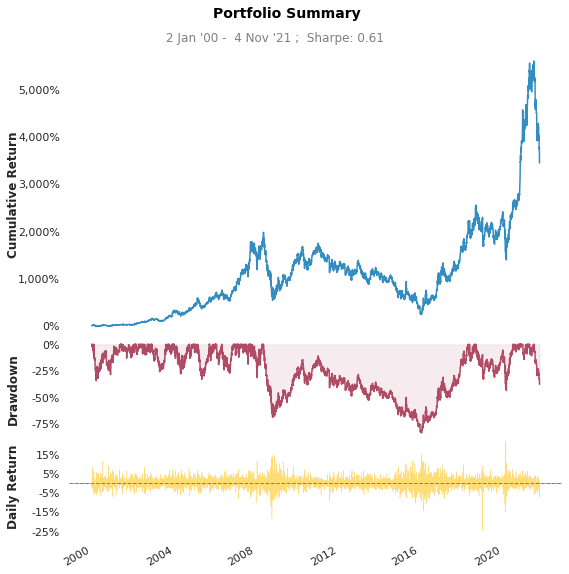

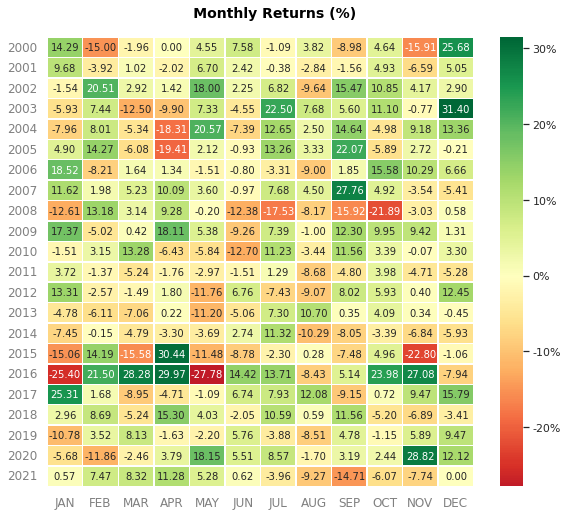

In [51]:
qs.reports.basic(Vale, benchmark="^BVSP");

## **Simulando uma carteira de ações**

In [52]:
tickers = "VALE3.SA, ITUB4.SA, B3SA3.SA, PETR4.SA, BBDC4.SA, PETR3.SA, MGLU3.SA, ABEV3.SA, WEGE3.SA, SUZB3.SA, GNDI3.SA, ITSA4.SA, JBSS3.SA, NTCO3.SA, BBAS3.SA"
carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed


In [53]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GNDI3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2019-12-18,18.036322,14.901788,46.054028,30.286613,64.650810,13.157246,34.779816,23.708218,11.825766,36.745049,28.471340,27.502119,39.570000,42.502636,16.620155
2019-12-19,18.111904,14.901788,46.526936,30.845142,66.006561,13.166662,34.951424,24.047169,11.847697,38.834198,28.427336,27.565157,39.669998,42.923931,16.473072
2019-12-20,18.335501,15.067503,46.435993,30.624939,66.540939,13.044227,34.798874,23.818148,11.840387,39.024124,28.101700,27.249968,40.180000,43.551891,16.615252
2019-12-23,18.383978,14.383173,47.836521,30.813700,65.699783,13.138408,35.123028,24.111294,11.876939,39.833794,28.515350,27.466095,40.040001,43.384960,16.584936
2019-12-26,18.636082,14.315660,48.382191,31.199854,67.609718,13.364445,35.656921,24.267029,11.962226,39.423958,28.770576,27.835316,40.720001,43.551891,17.105209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,16.700001,12.040000,28.910000,20.471119,64.959999,10.470000,23.851927,37.480000,11.150000,38.910000,29.590000,28.959999,48.910000,73.699997,37.830002
2021-10-29,16.990000,11.910000,28.500000,19.881662,64.180000,10.250000,23.292351,39.049999,10.810000,38.900002,27.670000,27.150000,49.230000,71.610001,37.000000
2021-11-01,17.360001,11.980000,29.150000,20.571026,65.720001,10.510000,24.219999,37.160000,11.300000,40.160000,28.700001,28.000000,48.910000,72.320000,36.959999


In [54]:
ibov.dropna(inplace=True)
ibov

Date
2016-11-04     61598.00000
2016-11-07     64052.00000
2016-11-08     64158.00000
2016-11-09     63258.00000
2016-11-10     61201.00000
                  ...     
2021-10-28    105705.00000
2021-10-29    103501.00000
2021-11-01    105551.00000
2021-11-03    105617.00000
2021-11-04    103412.09375
Name: Adj Close, Length: 1232, dtype: float64

# **Resultado**

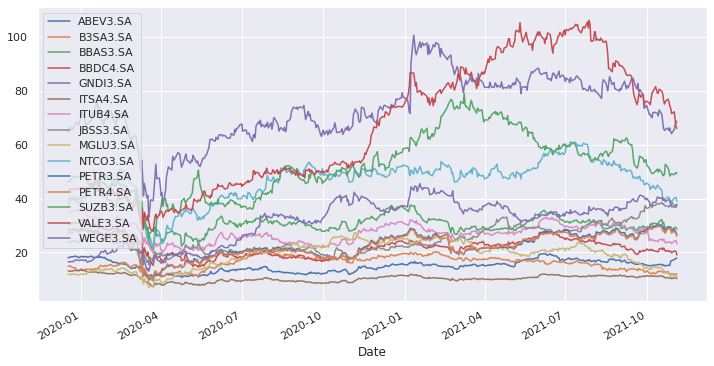

In [55]:
sns.set()
carteira.plot(figsize=(12,6));

In [56]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

In [ ]:
carteira_normalizada.plot(figsize=(12,6));

In [58]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [ ]:
carteira_normalizada

In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(14,6), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [ ]:
carteira_normalizada.describe()

In [ ]:
carteira_normalizada.plot_rolling_beta

## **Salvando Dados em Excel**

In [62]:
ibov.to_excel('ibovteste1.xlsx')
files.download('ibovteste1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
ifix.to_excel('ifix.xlsx')
files.download('ifix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
carteira_normalizada.to_excel('resultadocarteira.xlsx')
files.download('resultadocarteira.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
ibov_normalizado.to_excel('ibovnormalizado.xlsx')
files.download('ibovnormalizado.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Salvando Dados em CSV**





In [66]:
ibov.to_csv('ibovteste1.csv')
files.download('ibovteste1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
ifix.to_csv('ifix.csv')
files.download('ifix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
carteira_normalizada.to_csv('resultadocarteira.csv')
files.download('resultadocarteira.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
ibov_normalizado.to_csv('ibovnormalizado.csv')
files.download('ibovnormalizado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>